In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

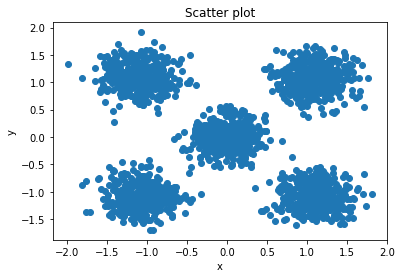

In [2]:
# Data generation

# Get centroids' coordinates 
c = [[1, 1],
     [-1, -1],
     [1, -1],
     [0, 0],
     [-1, 1]]

# Generate data for clustering
X, y = make_blobs(n_samples = 2000, centers = c, cluster_std = 0.22, random_state = 0)

# Data standardization
X = StandardScaler().fit_transform(X)

# Scatter plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot')
plt.show()

In [3]:
range_eps = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
range_num = range(7,17,2)


def hypar_opt(data, e:list, n:list, *args, **kwargs) -> np.array:
    
    
    '''
    Function to compute DBSCAN as a clustering algorithm for unsupervised machine learning, 
    by performing hyperparametric optimisation and evaluation of the best parameters. By 
    default, n_jobs = -1 and evaluation metric - silhouette_coefficient. 
    
    Inputs
    ------
    data: np.array
       Data with clusters
    e: list
       List with ranges for the eps parameter.
    n: list
       List with ranges for the min_samplese parameter.
       
    Returns
    -------
    optimal: np.array
       Array with the best hyperparameters. 1 x 5 array with values
       [eps, min_samples, silhouette_coefficient, n_clusters, n_noise]
       
    '''
    
    
    max_coeff = 0
    idx = 0
    
    for ii in e:
        for jj in n:
            db = DBSCAN(eps = ii, min_samples = jj, n_jobs = -1).fit(X)
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            scoeff = silhouette_score(X, labels)

            if scoeff > max_coeff:
                max_coeff = scoeff
                idx = (ii, jj, n_clusters_, n_noise_)  

    optimal = [idx[0], idx[1], max_coeff, idx[2], idx[3]]
    
    return optimal                           

In [4]:
best = hypar_opt(data = X, e = range_eps, n = range_num)
print('The most optimal parameters:\n\n [eps, min_samples, silhouette_coefficient, n_clusters, n_noise]\n\n', best)

The most optimal parameters:

 [eps, min_samples, silhouette_coefficient, n_clusters, n_noise]

 [0.35, 11, 0.715842325459209, 5, 0]


In [5]:
db = DBSCAN(eps = best[0], min_samples = best[1], n_jobs = -1).fit(X)
sc = silhouette_score(X, db.labels_)
print('Final silhouette coefficient:', f'{sc:.3f}')

Final silhouette coefficient: 0.716


In [6]:
help(hypar_opt)

Help on function hypar_opt in module __main__:

hypar_opt(data, e: list, n: list, *args, **kwargs) -> <built-in function array>
    Function to compute DBSCAN as a clustering algorithm for unsupervised machine learning, 
    by performing hyperparametric optimisation and evaluation of the best parameters. By 
    default, n_jobs = -1 and evaluation metric - silhouette_coefficient. 
    
    Inputs
    ------
    data: np.array
       Data with clusters
    e: list
       List with ranges for the eps parameter.
    n: list
       List with ranges for the min_samplese parameter.
       
    Returns
    -------
    optimal: np.array
       Array with the best hyperparameters. 1 x 5 array with values
       [eps, min_samples, silhouette_coefficient, n_clusters, n_noise]

